In [1]:
import json
import nltk
import gensim
import pandas
import string
import matplotlib.pyplot as plt  # Visualization library for plotting
import gensim.downloader as api

from nltk import sent_tokenize
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec, KeyedVectors
from sklearn.decomposition import PCA  # PCA for dimensionality reduction


In [ ]:
nltk.download('all')

#### <font color="green">Load the Json file </font>

In [31]:
with open('./data/Indoor_farming.json') as f:
    meta_data = json.load(f)
type(meta_data)

list

In [4]:
meta_data[0].keys()

dict_keys(['grow_cycle_id', 'family_name', 'category', 'date', 's3_path', 'annotation_type'])

In [5]:
grow_cycle_id=[]
family_name=[]
category=[]
annotation_type=[]
for i in meta_data:
    grow_cycle_id.append(i['grow_cycle_id'])
    family_name.append(i['family_name'])
    category.append(i['category'])
    annotation_type.append(i['annotation_type'])
print("grow_cycle_id:", grow_cycle_id)
print("family_name:", family_name)
print("category:", category)
print("annotation_type:", annotation_type)

grow_cycle_id: [51, 52, 53, 54, 55, 57, 61, 93, 95, 96, 115, 116, 119, 121, 144, 146, 148, 149, 151, 216, 218, 219, 220, 224, 249, 250, 251, 252, 253, 255, 256, 875, 876, 882, 883, 899, 900, 911, 912, 929, 931, '']
family_name: ['Basil', 'Basil', 'Lettuce', 'Basil', 'Lettuce', 'Lettuce', 'Lettuce', 'basil', 'basil', 'Lettuce', 'Basil', 'Lettuce', 'basil', 'basil', 'Cucumber', 'Cucumber', 'Cucumber', 'Basil', 'Basil', 'strawberry', 'Lettuce', 'Arugula', 'Arugula', 'Lettuce', 'Basil', 'Arugula', 'Pac Chai', 'kale', 'Basil', 'Pac choi', 'kale', 'Lettuce', 'Lettuce', 'Lettuce', 'Basil', 'Arugula', 'Basil', 'Lettuce', 'Lettuce', 'Basil', 'Lettuce', '']
category: ['zinc deficient-basil', 'full nutrient-basil (mrs-burn-lemon)', 'full nutrient-green butter', 'zinc deficient + treatment basil', 'Zinc deficient + treatment-green butter', 'iron deficient-green butter', 'Demo Scan', 'iron deficient basil', 'iron deficient + treatment basil', 'iron deficient + treatment green butter', 'Nufar Full N

#### <font color="green"> Text Preprocesing </font>

In [6]:
text_preprocessing_category=[''.join(remove_pun for remove_pun in cat if remove_pun not in string.punctuation) for cat in category]

In [7]:
print(text_preprocessing_category)

['zinc deficientbasil', 'full nutrientbasil mrsburnlemon', 'full nutrientgreen butter', 'zinc deficient  treatment basil', 'Zinc deficient  treatmentgreen butter', 'iron deficientgreen butter', 'Demo Scan', 'iron deficient basil', 'iron deficient  treatment basil', 'iron deficient  treatment green butter', 'Nufar Full Nutrient Basil', 'full nutrientgreen butter', 'Iron Deficient Basil', 'Iron Deficient  treatment basil', 'Zinc Deficient', 'Full Nutrient Cucumber', 'Zinc Deficient', 'Nufar Iron Deficient basil', 'Nufar Iron Deficient basil', 'strawberry 1', 'pac choi 1', 'wasabi arugula 1', 'astro arugula 1', 'monte carlo 1', 'EnStim Basil', 'EnStim Arugula', 'EnStim Pac Chai', 'EnStim Kale', 'EnStim  Zerotol Basil', 'EnStim  Zerotol', 'EnStim  Zerotol', 'green butter', 'monte carlo', 'Romaine', 'mrsburnlemon', 'Wasabi', 'mrsburnlemon', 'Green Butter', 'Romaine', 'mrs burn lemon', 'Romaine', '']


#### <font color="green"> Convert into the sentence to word </font>

In [8]:
words=[]
for text in text_preprocessing_category:
    sent_token = sent_tokenize(text)
    for sent in sent_token:
        words.append(simple_preprocess(sent))

In [9]:
words

[['zinc', 'deficientbasil'],
 ['full', 'nutrientbasil', 'mrsburnlemon'],
 ['full', 'nutrientgreen', 'butter'],
 ['zinc', 'deficient', 'treatment', 'basil'],
 ['zinc', 'deficient', 'treatmentgreen', 'butter'],
 ['iron', 'deficientgreen', 'butter'],
 ['demo', 'scan'],
 ['iron', 'deficient', 'basil'],
 ['iron', 'deficient', 'treatment', 'basil'],
 ['iron', 'deficient', 'treatment', 'green', 'butter'],
 ['nufar', 'full', 'nutrient', 'basil'],
 ['full', 'nutrientgreen', 'butter'],
 ['iron', 'deficient', 'basil'],
 ['iron', 'deficient', 'treatment', 'basil'],
 ['zinc', 'deficient'],
 ['full', 'nutrient', 'cucumber'],
 ['zinc', 'deficient'],
 ['nufar', 'iron', 'deficient', 'basil'],
 ['nufar', 'iron', 'deficient', 'basil'],
 ['strawberry'],
 ['pac', 'choi'],
 ['wasabi', 'arugula'],
 ['astro', 'arugula'],
 ['monte', 'carlo'],
 ['enstim', 'basil'],
 ['enstim', 'arugula'],
 ['enstim', 'pac', 'chai'],
 ['enstim', 'kale'],
 ['enstim', 'zerotol', 'basil'],
 ['enstim', 'zerotol'],
 ['enstim', 'zerot

In [10]:
corpus = [word for word in words]

print(f"Number of category: {len(corpus)}")

Number of category: 41


#### <font color="green"> Train a Custom Word2Vec Model </font>

In [12]:
model = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=2, workers=4, sg=0)

In [158]:
model.save('./word2vec_indoor_farming.model')

In [14]:
model=Word2Vec.load(r'D:\active-learning\GENERATIVEAI\genai_bootcamp\word2vec_indoor_farming.model')

In [ ]:
model.load('D:\active-learning\GENERATIVEAI\genai_bootcamp\word2vec_indoor_farming.model')

In [15]:
word_vectors = model.wv # Extract Word Vectors and Apply PCA for Dimensionality Reduction

#### <font color="green"> Get the list of words and their respective vectors </font>

In [16]:
words = list(word_vectors.index_to_key)  # List of words in the vocabulary
vectors = word_vectors[words]  # Corresponding vectors for each word

print(f"Vocabulary size: {len(words)}")  # Prints the size of the vocabulary

Vocabulary size: 20


In [17]:
vectors

array([[-5.3622725e-04,  2.3643136e-04,  5.1033497e-03, ...,
        -7.0415605e-03,  9.0145587e-04,  6.3925339e-03],
       [-8.6184675e-03,  3.6647876e-03,  5.1892065e-03, ...,
        -2.3916268e-03, -9.5095392e-03,  4.5061433e-03],
       [ 9.4858486e-05,  3.0785999e-03, -6.8181208e-03, ...,
         5.1612844e-04,  8.2163736e-03, -7.0252148e-03],
       ...,
       [ 1.8002307e-03,  7.0460914e-03,  2.9446983e-03, ...,
        -1.8595541e-03,  3.6117458e-03, -7.0364270e-03],
       [ 9.7362893e-03, -9.7806286e-03, -6.5031447e-03, ...,
        -2.7028006e-03,  3.8288161e-03,  3.3424803e-04],
       [ 5.6287632e-03,  5.4998551e-03,  1.8297510e-03, ...,
         7.3150201e-03,  5.4687690e-03,  9.2530604e-03]], dtype=float32)

#### <font color="green"> Applying PCA to reduce dimensionality </font>

In [18]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

#### <font color="green"> Plot the 2D Representation of Word Embeddings </font>

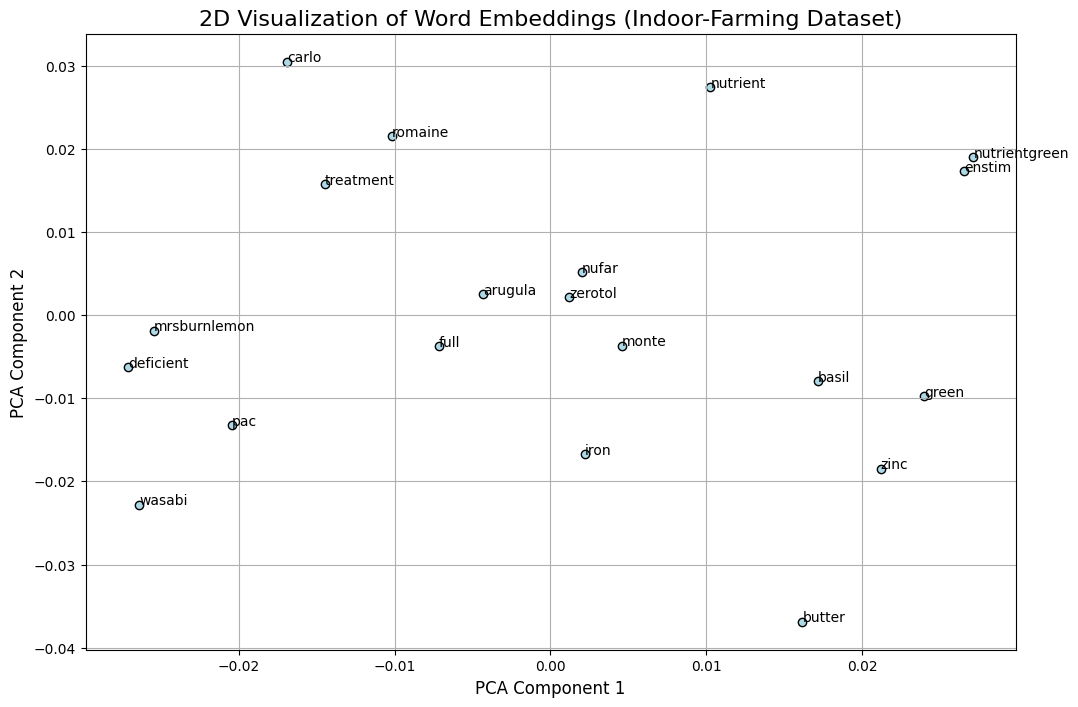

In [19]:
# Create a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], edgecolors='k', c='lightblue')

# Annotate a subset of words (for clarity, plot only the first 50 words)
for i, word in enumerate(words[:50]):
    plt.annotate(word, xy=(reduced_vectors[i, 0], reduced_vectors[i, 1]))

# Set plot labels and title
plt.title("2D Visualization of Word Embeddings (Indoor-Farming Dataset)", fontsize=16)
plt.xlabel("PCA Component 1", fontsize=12)
plt.ylabel("PCA Component 2", fontsize=12)
plt.grid(True)
plt.show()

#### <font color="green"> Check Similarity Between Words </font>

**Notes:** Test similarity between words using the trained model

In [20]:
word1 = "basil"
word2 = "romaine"
similarity = model.wv.similarity(word1, word2)
print(f"Similarity between '{word1}' and '{word2}': {similarity:.4f}")

Similarity between 'basil' and 'romaine': -0.1343


In [21]:
word1 = "basil"
word2 = "nutrient"
similarity = model.wv.similarity(word1, word2)
print(f"Similarity between '{word1}' and '{word2}': {similarity:.4f}")

Similarity between 'basil' and 'nutrient': 0.1607


In [22]:
word1 = "nutrient"
word2 = "treatment"
similarity = model.wv.similarity(word1, word2)
print(f"Similarity between '{word1}' and '{word2}': {similarity:.4f}")

Similarity between 'nutrient' and 'treatment': 0.1056


In [23]:
word_to_test = "nutrient"
similar_words = model.wv.most_similar(word_to_test, topn=5)
print(f"Top 5 words similar to '{word_to_test}':")
for word, score in similar_words:
    print(f"{word}: {score:.4f}")

Top 5 words similar to 'nutrient':
nutrientgreen: 0.2467
enstim: 0.1783
carlo: 0.1620
basil: 0.1607
treatment: 0.1056


In [24]:
word_to_test = "treatment"
similar_words = model.wv.most_similar(word_to_test, topn=5)
print(f"Top 5 words similar to '{word_to_test}':")
for word, score in similar_words:
    print(f"{word}: {score:.4f}")

Top 5 words similar to 'treatment':
carlo: 0.3190
wasabi: 0.1748
nutrientgreen: 0.1193
nufar: 0.1112
romaine: 0.1089


In [25]:
word_to_test = "basil"
similar_words = model.wv.most_similar(word_to_test, topn=5)
print(f"Top 5 words similar to '{word_to_test}':")
for word, score in similar_words:
    print(f"{word}: {score:.4f}")

Top 5 words similar to 'basil':
nutrient: 0.1607
monte: 0.1593
green: 0.1373
pac: 0.1230
nutrientgreen: 0.0855


In [26]:
word_to_test = "deficient"
similar_words = model.wv.most_similar(word_to_test, topn=5)
print(f"Top 5 words similar to '{word_to_test}':")
for word, score in similar_words:
    print(f"{word}: {score:.4f}")

Top 5 words similar to 'deficient':
wasabi: 0.2188
mrsburnlemon: 0.2162
arugula: 0.0931
treatment: 0.0929
nufar: 0.0796


In [27]:
word_to_test = "green"
similar_words = model.wv.most_similar(word_to_test, topn=5)
print(f"Top 5 words similar to '{word_to_test}':")
for word, score in similar_words:
    print(f"{word}: {score:.4f}")

Top 5 words similar to 'green':
butter: 0.2529
monte: 0.1425
basil: 0.1373
nutrientgreen: 0.1166
zinc: 0.0441


In [28]:
word_to_test = "butter"
similar_words = model.wv.most_similar(word_to_test, topn=5)
print(f"Top 5 words similar to '{word_to_test}':")
for word, score in similar_words:
    print(f"{word}: {score:.4f}")

Top 5 words similar to 'butter':
green: 0.2529
iron: 0.1702
arugula: 0.1502
zinc: 0.1389
wasabi: 0.1085
